# Web Scraping for Indeed.com & Predicting Salaries

In this project, we will practice two major skills: collecting data by scraping a website and then building a binary classifier.

We are going to collect salary information on data science jobs in a variety of markets. Then using the location, title and summary of the job we will attempt to predict the salary of the job. For job posting sites, this would be extraordinarily useful. While most listings DO NOT come with salary information (as you will see in this exercise), being to able extrapolate or predict the expected salaries from other listings can help guide negotiations.

Normally, we could use regression for this task; however, we will convert this problem into classification and use a random forest regressor, as well as another classifier of your choice; either logistic regression, SVM, or KNN. 

- **Question**: Why would we want this to be a classification problem?
- **Answer**: While more precision may be better, there is a fair amount of natural variance in job salaries - predicting a range be may be useful.

Therefore, the first part of the assignment will be focused on scraping Indeed.com. In the second, we'll focus on using listings with salary information to build a model and predict additional salaries.

### Scraping job listings from Indeed.com

We will be scraping job listings from Indeed.com using BeautifulSoup. Luckily, Indeed.com is a simple text page where we can easily find relevant entries.

First, look at the source of an Indeed.com page: (http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10")

Notice, each job listing is underneath a `div` tag with a class name of `result`. We can use BeautifulSoup to extract those. 

#### Setup a request (using `requests`) to the URL below. Use BeautifulSoup to parse the page and extract all results (HINT: Look for div tags with class name result)

The URL here has many query parameters

- `q` for the job search
- This is followed by "+20,000" to return results with salaries (or expected salaries >$20,000)
- `l` for a location 
- `start` for what result number to start on

In [3]:
URL = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn import metrics
import seaborn as sns


%matplotlib inline
sns.set_style("whitegrid")

import requests
import urllib
import bs4
from bs4 import BeautifulSoup
from random import randint
import pandas as pd
import numpy as np

In [80]:
irequest=requests.get(URL)
soup=BeautifulSoup(irequest.text,'lxml')

Let's look at one result more closely. A single `result` looks like

```
<div class=" row result" data-jk="2480d203f7e97210" data-tn-component="organicJob" id="p_2480d203f7e97210" itemscope="" itemtype="http://schema.org/JobPosting">
<h2 class="jobtitle" id="jl_2480d203f7e97210">
<a class="turnstileLink" data-tn-element="jobTitle" onmousedown="return rclk(this,jobmap[0],1);" rel="nofollow" target="_blank" title="AVP/Quantitative Analyst">AVP/Quantitative Analyst</a>
</h2>
<span class="company" itemprop="hiringOrganization" itemtype="http://schema.org/Organization">
<span itemprop="name">
<a href="/cmp/Alliancebernstein?from=SERP&amp;campaignid=serp-linkcompanyname&amp;fromjk=2480d203f7e97210&amp;jcid=b374f2a780e04789" target="_blank">
    AllianceBernstein</a></span>
</span>
<tr>
<td class="snip">
<nobr>$117,500 - $127,500 a year</nobr>
<div>
<span class="summary" itemprop="description">
C onduct quantitative and statistical research as well as portfolio management for various investment portfolios. Collaborate with Quantitative Analysts and</span>
</div>
</div>
</td>
</tr>
</table>
</div>
```

While this has some more verbose elements removed, we can see that there is some structure to the above:
- The salary is available in a `nobr` element inside of a `td` element with `class='snip`.
- The title of a job is in a link with class set to `jobtitle` and a `data-tn-element="jobTitle`.  
- The location is set in a `span` with `class='location'`. 
- The company is set in a `span` with `class='company'`. 

### Write 4 functions to extract each item: location, company, job, and salary.

example: 
```python
def extract_location_from_result(result):
    return result.find ...
```


- **Make sure these functions are robust and can handle cases where the data/field may not be available.**
    - Remember to check if a field is empty or `None` for attempting to call methods on it
    - Remember to use `try/except` if you anticipate errors
- **Test** the functions on the results above and simple examples

In [2]:

def extract_location_from_result(result):
    return result.find('span', attrs={'class':'location'}).getText() 
def extract_salary_from_result(result):
    try:
        #<td class="snip">
        return result.find('td', attrs={'class':'snip'}).find('nobr').getText().strip()
    except:
        return np.NAN
def extract_title_from_result(result):
    return result.find('a', attrs={'class':'turnstileLink'}).attrs['title']
def extract_company_from_result(result):
    return result.find('span', attrs={'itemprop':'name'}).getText().strip()
def extract_summary_from_result(result):
    return result.find('span', { 'class':"summary"}).text



In [81]:
query=
print extract_location_from_result(soup.find("div",attrs={"class":" row result"}))
print extract_salary_from_result(soup.find("div", attrs={"class":" row result"}))
print extract_title_from_result(soup.find("div", attrs={"class":" row result"}))
print extract_company_from_result(soup.find("div", attrs={"class":"  row result"}))

New York, NY 10022 (Midtown area)
None
Machine Learning Research Scientist
Futures Group


Now, to scale up our scraping, we need to accumulate more results. We can do this by examining the URL above.

- "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

There are two query parameters here we can alter to collect more results, the `l=New+York` and the `start=10`. The first controls the location of the results (so we can try a different city). The second controls where in the results to start and gives 10 results (thus, we can keep incrementing by 10 to go further in the list).

#### Complete the following code to collect results from multiple cities and starting points. 
- Enter your city below to add it to the search
- Remember to convert your salary to U.S. Dollars to match the other cities if the currency is different

In [3]:
YOUR_CITY = 'Raleigh+NC'

In [ ]:

from time import sleep
url_template = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l={}&start={}"

results2 = []
for j in range(1,50):
    max_results_per_city = 100 * j # Set this to a high-value (5000) to generate more results. 
    # Crawling more results, will also take much longer. First test your code on a small number of results and then expand.


    for city in set (['New+York', 'Chicago', 'San+Francisco', 'Austin', 'Seattle', 
        'Los+Angeles', 'Philadelphia', 'Atlanta', 'Dallas', 'Pittsburgh', 
        'Portland', 'Phoenix', 'Denver', 'Houston', 'Miami', YOUR_CITY]):

        for start in range((j-1)*100, max_results_per_city, 10):
            # Grab the results from the request (as above)

            city10=requests.get("http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=" + city + "&start=" + str(start))
            # Append to the full set of results
            c = BeautifulSoup(city10.text,"html.parser")
            results2.append(c)
        #sleep(1)
    sleep(randint(10,5000))

In [5]:
urls = []
cities= ['New+York', 'Chicago', 'San+Francisco', 'Austin', 'Seattle', 
        'Los+Angeles', 'Philadelphia', 'Atlanta', 'Dallas', 'Pittsburgh', 
        'Portland', 'Phoenix', 'Denver', 'Houston', 'Miami', YOUR_CITY]

for cty in cities:
    for start in range(0,5000, 10):
        urls.append("http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=" + cty + "&start=" + str(start))

In [ ]:
len(urls)

In [8]:
# read from url's
request=[]

for u in urls:
        req=requests.get(u)
        d = BeautifulSoup(req.text,"html.parser")
        jobs=d.findAll("div", attrs={"class":" row result"})
        request.append(d)
        

In [9]:
len(request)

8000

#### Use the functions you wrote above to parse out the 4 fields - location, title, company and salary. Create a dataframe from the results with those 4 columns.

In [ ]:
## YOUR CODE HERE
df={}
df=pd.DataFrame(columns=["Title","Company","Location" ,"Salary","Summary"])
i=0
for r in request:
    for row in r.findAll("div", attrs={"class":" row result"}):
        title=extract_title_from_result(row)
        company= extract_company_from_result(row)
        location= extract_location_from_result(row)
        salary=extract_salary_from_result(row)
        summary=extract_summary_from_result(row)
        df.loc[i] = pd.Series({'Title':title, 'Company':company, 'Location':location, 'Salary':salary, 'Summary':summary})
        i+=1

In [77]:
df={}
df=pd.DataFrame(columns=["Title","Company","Location" ,"Salary","Summary"])
i=len(df)

for r in request:
    for row in r.find_all("div", attrs={"class":" row result"}):
        try:
            salary=row.find('td', attrs={'class':'snip'}).find('nobr').getText().strip()
        except:
            salary=np.NaN
        
        if salary is not np.NaN:
            
            location=row.find('span', attrs={'class':'location'}).getText() 

            title=row.find('a', attrs={'class':'turnstileLink'}).attrs['title']
            try:
                company=row.find('span', attrs={'itemprop':'name'}).getText().strip()
                #row.find('span', attrs={'class':'company'}).getText().strip()
            except:
                company=np.NaN
                
            summary=row.find('span', { 'class':"summary"}).text

            df.loc[i] = pd.Series({'Title':title, 'Company':company, 'Location':location, 'Salary':salary, 'Summary':summary})
            i+=1

In [78]:
len(df)

3645

In [143]:
df.tail(10)

,Title,Company,Location,Salary,Summary
3635,Quality Control Scientist,ZP Group,"Durham, NC 27703",$26 - $32 an hour,\nQuality Control (QC) Scientist. The QC Scien...
3636,EPA GIS EnviroAtlas Support Associate,Oak Ridge Associated Universities,"Research Triangle Park, NC",$27.72 an hour,\nThe selected candidate shall provide data ma...
3637,Sr Software Engineer - Big Data/Machine Learning,PeopleScout,"Raleigh-Durham, NC","$125,000 a year",\nDesign and work with complex data models in ...
3638,EPA Dietary Assessment Research Associate,Oak Ridge Associated Universities,"Research Triangle Park, NC",$33.37 an hour,\nResearch is conducted in a broad range of en...
3639,Statistician WITH PHD,Adecco: USA,"Morrisville, NC",$70 an hour,\nDevelop or apply mathematical or statistical...
3640,"EPA GIS EnviroAtlas Support Associate, Geograp...",Oak Ridge Associated Universities,"Research Triangle Park, NC",$27.72 an hour,\nThe selected candidate shall provide data ma...
3641,Quality Control Scientist,Piper Clinical Solutions,"Durham, NC 27703",$26 - $32 an hour,\nQuality Control (QC) Scientist. The QC Scien...
3642,Tutor or Teacher - Computer Programming,NaN,"Wake Forest, NC 27587",$24 - $30 an hour,\nIt's part of a suite of Data Scientist cours...
3643,EPA Environmental Chemical Safety Testing Asso...,Oak Ridge Associated Universities,"Research Triangle Park, NC",$27.72 an hour,\nPerforming all activities associated with co...
3644,Applications Engineer / Linux-Scripting,Adecco: USA,"Durham, NC",$44 an hour,\nStrong interpersonal skills and ability to e...


In [193]:
df[df.Location.str.contains(', GA')]

,Title,Company,Location,Salary,Summary
2545,Mathematical Statistician,Centers for Disease Control and Prevention,"Atlanta, GA","$88,305 - $114,802 a year","\nTo conduct evaluations of data collection, r..."
2546,Lead Data Scientist,Stackfolio,"Atlanta, GA 30308 (Old Fourth Ward area)","$80,000 a year",\nWe are looking for a bright and experienced ...
2547,Health Scientist,Centers for Disease Control and Prevention,"Atlanta, GA","$122,744 - $159,572 a year",\nAs a Health Scientist you will:. Data Analys...
2548,Health Scientist (Vulnerable Populations),Centers for Disease Control and Prevention,"Atlanta, GA","$122,744 - $159,572 a year",\nAs a Health Scientist (Vulnerable Population...
2549,Research Microbiologist,Centers for Disease Control and Prevention,"Atlanta, GA","$74,260 - $114,802 a year",\nCollaborate with scientists and program cons...
2550,"Scientist, Med Imag Analysis",Emory University,"Atlanta, GA","$69,900 a year","\nThe Medical Image Analysis Scientist, works ..."
2551,Associate Research Analyst,CSTE,"Atlanta, GA 30341","$51,706 a year",\nSkills with developing and presenting epidem...
2552,Sr. Data Scientist,CHASE Professionals,"Duluth, GA","$100,000 - $120,000 a year",\nSenior Data Scientist. The Senior Data Scien...
2553,Institutional Research Analyst,Emory University,"Atlanta, GA","$69,900 a year",\nManaging benchmark data; Primary responsibil...
2554,Big Data Engineer,Topmist,"Atlanta, GA","$80,000 a year","\nAt Topmist, we bring together the brightest ..."


Lastly, we need to clean up salary data. 

1. Only a small number of the scraped results have salary information - only these will be used for modeling.
1. Some of the salaries are not yearly but hourly or weekly, these will not be useful to us for now
1. Some of the entries may be duplicated
1. The salaries are given as text and usually with ranges.

#### Find the entries with annual salary entries, by filtering the entries without salaries or salaries that are not yearly (filter those that refer to hour or week). Also, remove duplicate entries

In [194]:
## YOUR CODE HERE
dfc=df.copy()
#dfc=indeed.copy()
dfc=dfc.drop_duplicates()
dfc=dfc.dropna()
dfc=dfc[dfc.Salary.str.contains('a year')]
dfc.shape

(290, 5)

#### Write a function that takes a salary string and converts it to a number, averaging a salary range if necessary

In [195]:
def clean_Salary(sal):
    if  (" - ") in sal:
        sal=sal.replace('$','')
        sal=sal.replace(',','')
        sal=sal.replace('a year','')
        sp=sal.split(" - ")
        sal=(float(sp[0])+float(sp[1]))/2
    else:
        sal=sal.replace('$','')
        sal=sal.replace(',','')
        sal=sal.replace('a year','')
        sal=float(sal.strip())
    return sal   


In [196]:
dfc.Salary=[clean_Salary(x) for x in dfc.Salary]

In [27]:
df_raw=pd.read_csv('indeed_jobs.csv')

In [28]:
indeed['Location']=df_raw.Location

In [24]:
c_city=[]
test=['San Francisco Bay Area, CA', 'Martinez, CA', 'Austin, TX 78746']   
for L in indeed.Location: #dfc.Location:
    if ', NY' in L:
        city= "New York"
    elif ', IL' in L:
        city= "Chicago"
    elif 'Austin, TX' in L:   
        city= "Austin"
    elif ', WA' in L:
        city= "Seattle"
    elif ', GA'  in L:
        city= 'Atlanta'
    elif 'Houston, TX'  in L:
        city= "Houston"
    elif ', TX'  in L:
        city= "Dallas"
    elif 'Pittsburgh' in L:
        city= "Pittsburgh"
    elif ', PA'  in L:
        city= "Philadelphia"
    elif ', OR'  in L:
        city= "Portland"
    elif ', AZ' in L:
        city= "Phoenix"
    elif ', CO'  in L:
        city= "Denver"
    elif ', FL'  in L:
        city= "Miami"
    elif ', NC' in L:
        city= "Raleigh"
    elif 'Los Angeles' in L:
        city= "Los Angeles"
    elif 'Woodland Hills' in L:
        city= "Los Angeles"
    elif 'Santa Monica' in L:
        city= "Los Angeles" 
    elif 'Anaheim' in L:
        city= "Los Angeles"
    elif 'Pasadena' in L:
        city= "Los Angeles"
    else:
        city= "San Francisco"
        
    c_city.append(city) 

indeed['City'] = c_city


In [204]:
dfc

,Title,Company,Location,Salary,Summary,City
0,Data Scientist,Big Cloud,"New York, NY",150000.0,"\nAre you an experienced, talented and creativ...",New York
2,Data Scientist,Princeton Consulting,"New York, NY 10018 (Clinton area)",150000.0,\nAbility to visualize and communicate data sc...,New York
3,"Data Scientist, Predictive Modeling",Workbridge Associates,"New York, NY",115000.0,\nThey are looking for a skilled data scientis...,New York
4,Data Scientist,Smith Hanley Associates,"New York, NY",82500.0,\nMissing data imputation. Conduct basic resea...,New York
5,Data Scientist,Workbridge Associates,"New York, NY",115000.0,\nAny other experience within data scalability...,New York
6,Data Scientist,TalentHub Worldwide,"New York, NY 10017 (Midtown area)",105000.0,\nThe Data Scientist assists in creating and m...,New York
7,climate scientist,Research Foundation of The City University of ...,"New York, NY",61500.0,\nExperience with data analysis and statistica...,New York
8,"Research Scientist IV, Grade 27, Job 741871","Research Foundation for Mental Hygiene, Inc.","New York, NY 10032 (Washington Heights area)",55268.0,\nAnalysis of functional and structural MRI da...,New York
9,Data Scientist,TW Staffing Solutions,"New York, NY",199000.0,\nData Scientist - New York (total compensatio...,New York
10,"Director, Data Scientist, Marketing Science",Hearts & Science,"New York, NY",150000.0,\nDefine measurement and analytics approaches ...,New York


### Save your results as a CSV

In [162]:
## YOUR CODE HERE
df.to_csv('indeed_jobs.csv', encoding='utf-8')
dfc.to_csv('indeed_jobs_cleaned.csv', encoding='utf-8')

## Predicting salaries using Random Forests + Another Classifier

#### Load in the the data of scraped salaries

In [30]:
## YOUR CODE HERE
df=pd.read_csv('indeed_jobs_cleaned.csv')

indeed=df.copy()
#indeed=dfc.copy()

In [ ]:
indeed

In [32]:
indeed.City.value_counts(dropna=False)

New York         82
Chicago          33
San Francisco    31
Atlanta          21
Philadelphia     20
Los Angeles      17
Phoenix          16
Seattle          14
Miami            13
Dallas           13
Raleigh          11
Denver            9
Austin            5
Portland          5
Name: City, dtype: int64

In [208]:
dfc.drop('Location', axis=1,inplace=True)

#### We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median)

We could also perform Linear Regression (or any regression) to predict the salary value here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW salary.

While performing regression may be better, performing classification may help remove some of the noise of the extreme salaries. We don't have to choice the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of salaries, 

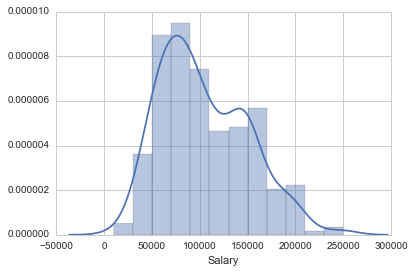

In [209]:
sns.distplot(indeed.Salary)

In [36]:
Q50=np.percentile(indeed.Salary,50)
indeed['Target']=[1 if x > Q50 else 0 for x in indeed.Salary]

In [214]:
indeed.Target.unique()

array([1, 0])

#### Thought experiment: What is the baseline accuracy for this model?

In [262]:
indeed.head(2)

,Title,Company,Location,Salary,Summary,City,Target,c_Austin,c_Chicago,c_Dallas,...,c_Pittsburgh,c_Portland,c_Raleigh,c_San Francisco,c_Seattle,t_Lead,t_Manager,t_Other,t_Senior,SecondTitle
0,Data Scientist,Big Cloud,"New York, NY",150000.0,"\nAre you an experienced, talented and creativ...",New York,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Other
2,Data Scientist,Princeton Consulting,"New York, NY 10018 (Clinton area)",150000.0,\nAbility to visualize and communicate data sc...,New York,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Other


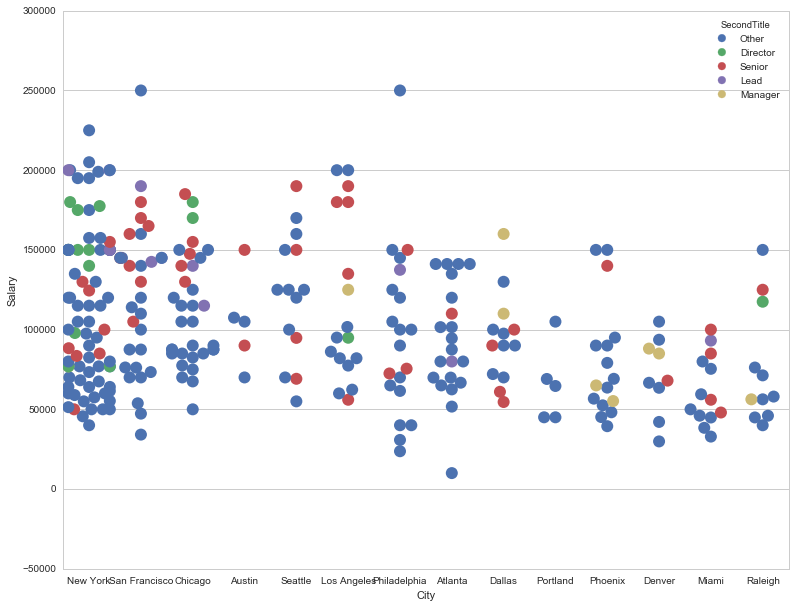

In [139]:
plt.figure(figsize=(13, 10))
sns.swarmplot(indeed.City,indeed.Salary,hue=indeed.SecondTitle,size=12)

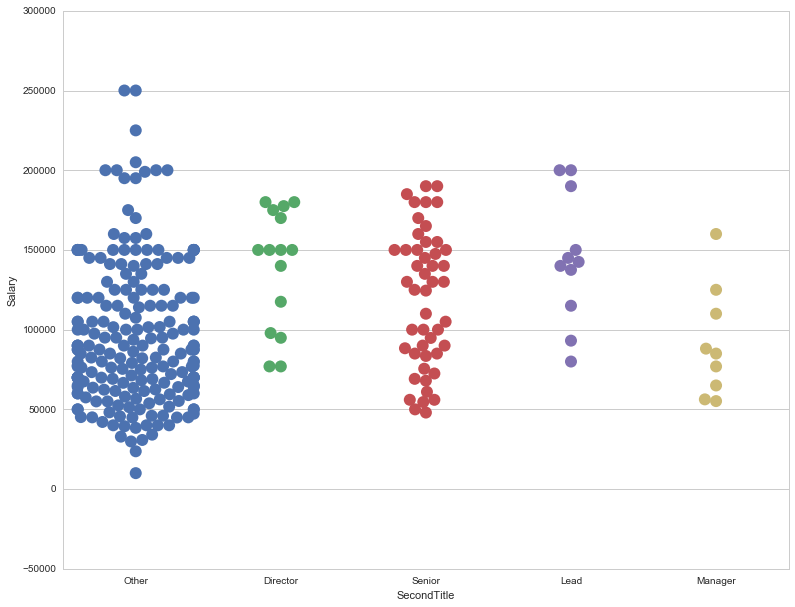

In [140]:
plt.figure(figsize=(13, 10))
sns.swarmplot(indeed.SecondTitle,indeed.Salary,size=12)

In [34]:
city_dummies = pd.get_dummies(indeed.City, prefix='c').iloc[:, 1:]
indeed = pd.concat([indeed, city_dummies], axis=1)


In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
cfeatures=[
        'c_Austin',
        'c_Chicago',
        'c_Dallas',
        'c_Denver', 
        'c_Los Angeles',
        'c_Miami',
        'c_New York',
        'c_Philadelphia',
        'c_Phoenix',
        'c_Portland',
        'c_Raleigh',
        'c_San Francisco',
        'c_Seattle'
]
X =indeed[cfeatures]
y = indeed.Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#Fit our model to our training data
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.61627906976744184

#### Create a Random Forest model to predict High/Low salary using statsmodel. Start by ONLY using the location as a feature. 

In [52]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred=rfc.predict(X_test)
accuracy_score(y_test,y_pred)

0.61627906976744184

#### Create a few new variables in your dataframe to represent interesting features of a job title.
- For example, create a feature that represents whether 'Senior' is in the title 
- or whether 'Manager' is in the title. 
- Then build a new Random Forest with these features. Do they add any value? 


#### Rebuild this model with scikit-learn.
- You can either create the dummy features manually or use the `dmatrix` function from `patsy`
- Remember to scale the feature variables as well!


In [39]:
## YOUR CODE HERE
title2=[]
for t in indeed.Title:
    
    if 'Senior' in t or 'Sr.' in t or 'Sr ' in t : 
        secondTitle='Senior'
    elif 'Manager' in t:
        secondTitle='Manager'
    elif 'Director' in t or 'VP' in t:
        secondTitle='Director'
    elif 'Lead' in t:
        secondTitle='Lead'
    else:
        secondTitle='Other'

    title2.append(secondTitle)
indeed['SecondTitle']=title2


In [40]:
title_dummies = pd.get_dummies(indeed.SecondTitle, prefix='t').iloc[:, 1:]
indeed = pd.concat([indeed, title_dummies], axis=1)

In [256]:
#indeed.drop('SecondTitle', axis=1,inplace=True)

In [154]:
## YOUR CODE HERE
features=[
        'c_Austin',
        'c_Chicago',
        'c_Dallas',
        'c_Denver', 
        'c_Los Angeles',
        'c_Miami',
        'c_New York',
        'c_Philadelphia',
        'c_Phoenix',
        'c_Portland',
        'c_Raleigh',
        'c_San Francisco',
        'c_Seattle',
        't_Lead',
        't_Manager',
        't_Other', 
        't_Senior',
]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X =indeed[features]
y = indeed.Target
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred=rfc.predict(X_test)



#### Use cross-validation in scikit-learn to evaluate the model above. 
- Evaluate the accuracy of the model. 

In [155]:
accuracy_score(y_test,y_pred)

0.69767441860465118

#### Random Forest Regressor

Let's try treating this as a regression problem. 

- Train a random forest regressor on the regression problem and predict your dependent.
- Evaluate the score with a 5-fold cross-validation
- Do a scatter plot of the predicted vs actual scores for each of the 5 folds, do they match?

In [226]:
## YOUR CODE HERE


In [67]:
tfeatures=[
        'c_Austin',
        'c_Chicago',
        'c_Dallas',
        'c_Denver', 
        'c_Los Angeles',
        'c_Miami',
        'c_New York',
        'c_Philadelphia',
        'c_Phoenix',
        'c_Portland',
        'c_Raleigh',
        'c_San Francisco',
        'c_Seattle',
        't_Lead',
        't_Manager',
        't_Other', 
        't_Senior',
]

X =indeed[tfeatures]
y = indeed.Target
regressor = RandomForestRegressor()
regressor.fit(X, y)
y_pred=regressor.predict(X)

s=cross_val_score(RandomForestRegressor(), X, y, cv=5, n_jobs=-1)
print "{} Score:\t{:0.3} ± {:0.3}".format("Random Forest Regressor", s.mean().round(3), s.std().round(3))

Random Forest Regressor Score:	-0.337 ± 0.202


In [68]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier


cv = StratifiedKFold(y, n_folds=5, shuffle=True, random_state=55)

dt = DecisionTreeClassifier()

# instatiate
bdt = BaggingClassifier(DecisionTreeClassifier())
rf = RandomForestClassifier(n_jobs=-1)
et = ExtraTreesClassifier(n_jobs=-1)

def score(model, name):
   s = cross_val_score(model, X, y, cv=cv, n_jobs=-1)
   print "{} Score:\t{:0.3} ± {:0.3}".format(name, s.mean().round(3), s.std().round(3))

# how did they do?!
score(dt, "Decision Tree")
score(bdt, "Bagging DT")
score(rf, "Random Forest")
score(et, "Extra Trees")


Decision Tree Score:	0.597 ± 0.023
Bagging DT Score:	0.576 ± 0.008
Random Forest Score:	0.579 ± 0.028
Extra Trees Score:	0.603 ± 0.022


In [74]:
from sklearn.cross_validation import train_test_split, KFold
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    a = accuracy_score(y_test, y_pred)
    
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    print cm
    print cr
    
    return a
all_models={}
params = {'n_estimators':[3, 5, 10, 50],
          'criterion': ['gini', 'entropy'],
          'max_depth': [None, 3, 5],
          'min_samples_split': [2,5],
          'class_weight':[None, 'balanced']}


gsrf = GridSearchCV(RandomForestClassifier(n_jobs=-1),
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

gsrf.fit(X, y)
print gsrf.best_params_
print gsrf.best_score_

all_models['gsrf'] = {'model': gsrf.best_estimator_,
                      'score': evaluate_model(gsrf.best_estimator_)}

{'min_samples_split': 5, 'n_estimators': 5, 'criterion': 'entropy', 'max_depth': 5, 'class_weight': 'balanced'}
0.662068965517
[[29 14]
 [22 21]]
             precision    recall  f1-score   support

          0       0.57      0.67      0.62        43
          1       0.60      0.49      0.54        43

avg / total       0.58      0.58      0.58        86



#### Continue to incorporate other text features from the title or summary that you believe will predict the salary and examine their coefficients

#### Take ~100 scraped entries with salaries. Convert them to use with your model and predict the salary - which entries have the highest predicted salaries?

In [153]:
## YOUR CODE HERE
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer,TfidfTransformer
stword="looking,large,client,add"
#vectorizer = TfidfVectorizer(stop_words='english', lowercase=True, ngram_range=(1,4), min_df=2)
vectorizer = CountVectorizer(stop_words='english', lowercase=True, ngram_range=(1,4), min_df=2)
X = vectorizer.fit_transform(indeed.Title)
y=indeed.Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
tree_model = DecisionTreeClassifier()
print cross_val_score(tree_model, X, y)

rf_model = RandomForestClassifier(n_estimators=10)
s=cross_val_score(rf_model, X, y)
print s
print np.mean(s)

[ 0.81632653  0.70833333  0.65625   ]
[ 0.80612245  0.69791667  0.65625   ]
0.720096371882


In [142]:
rf_model.fit(X,y)
#This prints the top 10 most important features
sorted(zip(rf_model.feature_importances_, vectorizer.get_feature_names()), reverse=True)[:10]

[(0.086232578236400473, u'data'),
 (0.054619590375542759, u'research'),
 (0.050689079221397128, u'data scientist'),
 (0.040644969331651223, u'quantitative'),
 (0.032015501403047389, u'engineer'),
 (0.027229483102717618, u'analyst'),
 (0.021043610917442227, u'senior'),
 (0.018978004686538368, u'learning'),
 (0.018255724461840657, u'quant'),
 (0.017307025338912246, u'big')]

### BONUS 

#### Bonus: Use Count Vectorizer from scikit-learn to create features from the text summaries. 
- Examine using count or binary features in the model
- Re-evaluate your models using these. Does this improve the model performance? 
- What text features are the most valuable? 

In [157]:
## YOUR CODE HERE
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer,TfidfTransformer
stword="looking,large,client,add"
#vectorizer = TfidfVectorizer(stop_words='english', lowercase=True, ngram_range=(1,4), min_df=2)
vectorizer = CountVectorizer(stop_words='english', lowercase=True, ngram_range=(1,3), min_df=2)
X = vectorizer.fit_transform(indeed.Summary)
y=indeed.Target

tree_model = DecisionTreeClassifier()
print cross_val_score(tree_model, X, y)

rf_model = RandomForestClassifier(n_estimators=10)
s=cross_val_score(rf_model, X, y)
print np.mean(s)

[ 0.73469388  0.71875     0.69791667]
0.696499433107


In [ ]:
#----------------------------------

In [151]:
## YOUR CODE HERE
rf_model.fit(X,y)
#This prints the top 10 most important features
sorted(zip(rf_model.feature_importances_, vectorizer.get_feature_names()), reverse=True)[:10]

[(0.040947092167701246, u'data scientist'),
 (0.029433083762475821, u'big data'),
 (0.028580941735706071, u'company'),
 (0.024931390868988559, u'data'),
 (0.012268095087318584, u'team'),
 (0.010966927957255576, u'python'),
 (0.010539745737180478, u'looking'),
 (0.010198344369067617, u'research'),
 (0.0097417862409498353, u'client'),
 (0.0093777337156901071, u'build')]

#### 

In [152]:
tree_model.fit(X,y)
#This prints the top 10 most important features
sorted(zip(tree_model.feature_importances_, vectorizer.get_feature_names()), reverse=True)[:10]

[(0.13049158050537898, u'data scientist'),
 (0.074725234355337802, u'data scientists'),
 (0.064650504766688446, u'big'),
 (0.040566050434735108, u'analytics'),
 (0.035870905708492704, u'build'),
 (0.033773157653221877, u'looking'),
 (0.032717737375956263, u'relevant'),
 (0.030373338958025728, u'firm'),
 (0.027586299792227226, u'professionals'),
 (0.02656458498510764, u'110')]